In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

 
path = "./Datasets/"
general_data_merged = pd.read_csv(path +"general_data_merged.csv")
general_data_merged.head()


,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AttendanceScore
0,-1,2.0,2.0,6,2,1.0,1,1,0.0,131160,...,6,1,0,0,3.0,4.0,2.0,3,3,0 days 07:22:25.142241379
1,1,1.0,1.0,10,1,1.0,2,1,6.0,41890,...,3,5,1,4,3.0,2.0,4.0,2,4,0 days 07:43:08.288135593
2,-1,1.0,1.0,17,4,4.0,3,4,7.0,193280,...,2,5,0,3,2.0,2.0,1.0,3,3,0 days 07:00:47.665289256
3,-1,0.0,1.0,2,5,1.0,4,3,1.0,83210,...,5,8,7,5,4.0,4.0,3.0,2,3,0 days 07:11:37.242553191
4,-1,2.0,1.0,10,1,3.0,5,1,7.0,23420,...,2,6,0,4,4.0,1.0,3.0,3,3,0 days 08:00:22.228571428


In [41]:
def retain_terminal(frame):
    for i in frame.keys():
        for a in range(len(frame[i])):
            if frame[i][a] > 0.1 or frame[i][a] < -0.1:
                frame[i][a] = frame[i][a]
            else:
                frame[i][a] = 0
    return frame

In [42]:
def separation_significant_parameters(frame):
    significient_parameter = []
    insignificient_parameter = []
    for i in frame.keys():
        if frame[i].value_counts()[0] == len(frame[i]) - 1:
            insignificient_parameter.append(i)
        else:
            significient_parameter.append(i)
    return significient_parameter, insignificient_parameter

In [43]:
# Convert non-numeric columns to numeric or remove them
for col in general_data_merged.columns:
    if general_data_merged[col].dtype == 'object':
        try:
            general_data_merged[col] = pd.to_numeric(general_data_merged[col])
        except ValueError:
            general_data_merged = general_data_merged.drop(col, axis=1)

# Now calculate the correlation
corr_data = general_data_merged.copy().corr()


In [44]:
corr_data = retain_terminal(corr_data)

C:\Users\Adrien\AppData\Local\Temp\ipykernel_18048\76677709.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if frame[i][a] > 0.1 or frame[i][a] < -0.1:
C:\Users\Adrien\AppData\Local\Temp\ipykernel_18048\76677709.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frame[i][a] = frame[i][a]
C:\Users\Adrien\AppData\Local\Temp\ipykernel_18048\76677709.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will nev

<Axes: >

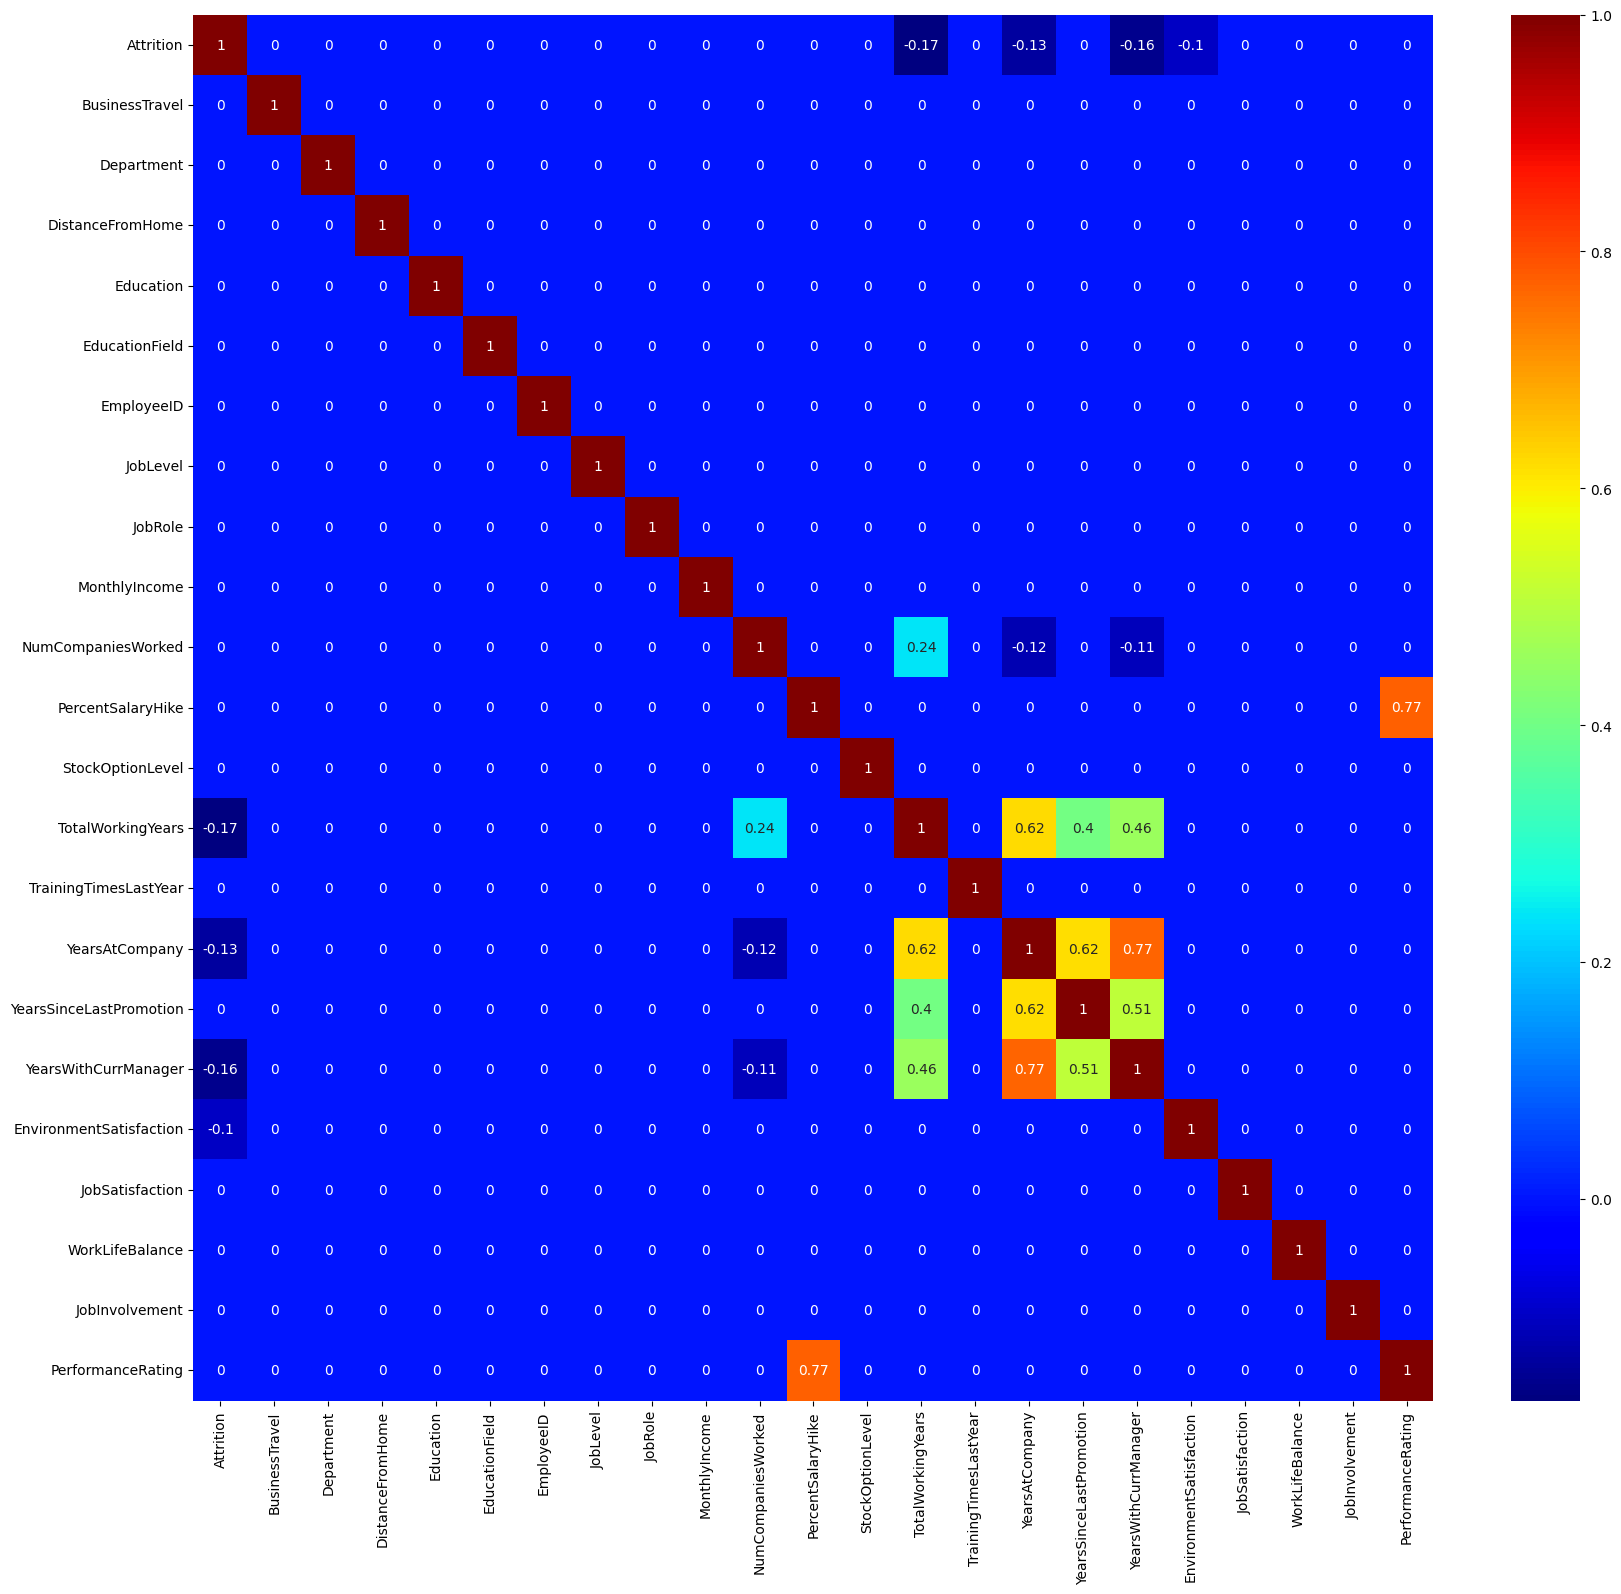

In [45]:


plt.figure(figsize=(20,18))
sns.heatmap(corr_data, annot = True, cmap=plt.get_cmap("jet"))


In [46]:
significant_parameter, insignificant_parameter = separation_significant_parameters(corr_data)
insignificant_parameter


['BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeID',
 'JobLevel',
 'JobRole',
 'MonthlyIncome',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement']

C:\Users\Adrien\AppData\Local\Temp\ipykernel_18048\76677709.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if frame[i][a] > 0.1 or frame[i][a] < -0.1:
C:\Users\Adrien\AppData\Local\Temp\ipykernel_18048\76677709.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frame[i][a] = frame[i][a]
C:\Users\Adrien\AppData\Local\Temp\ipykernel_18048\76677709.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will nev

<Axes: >

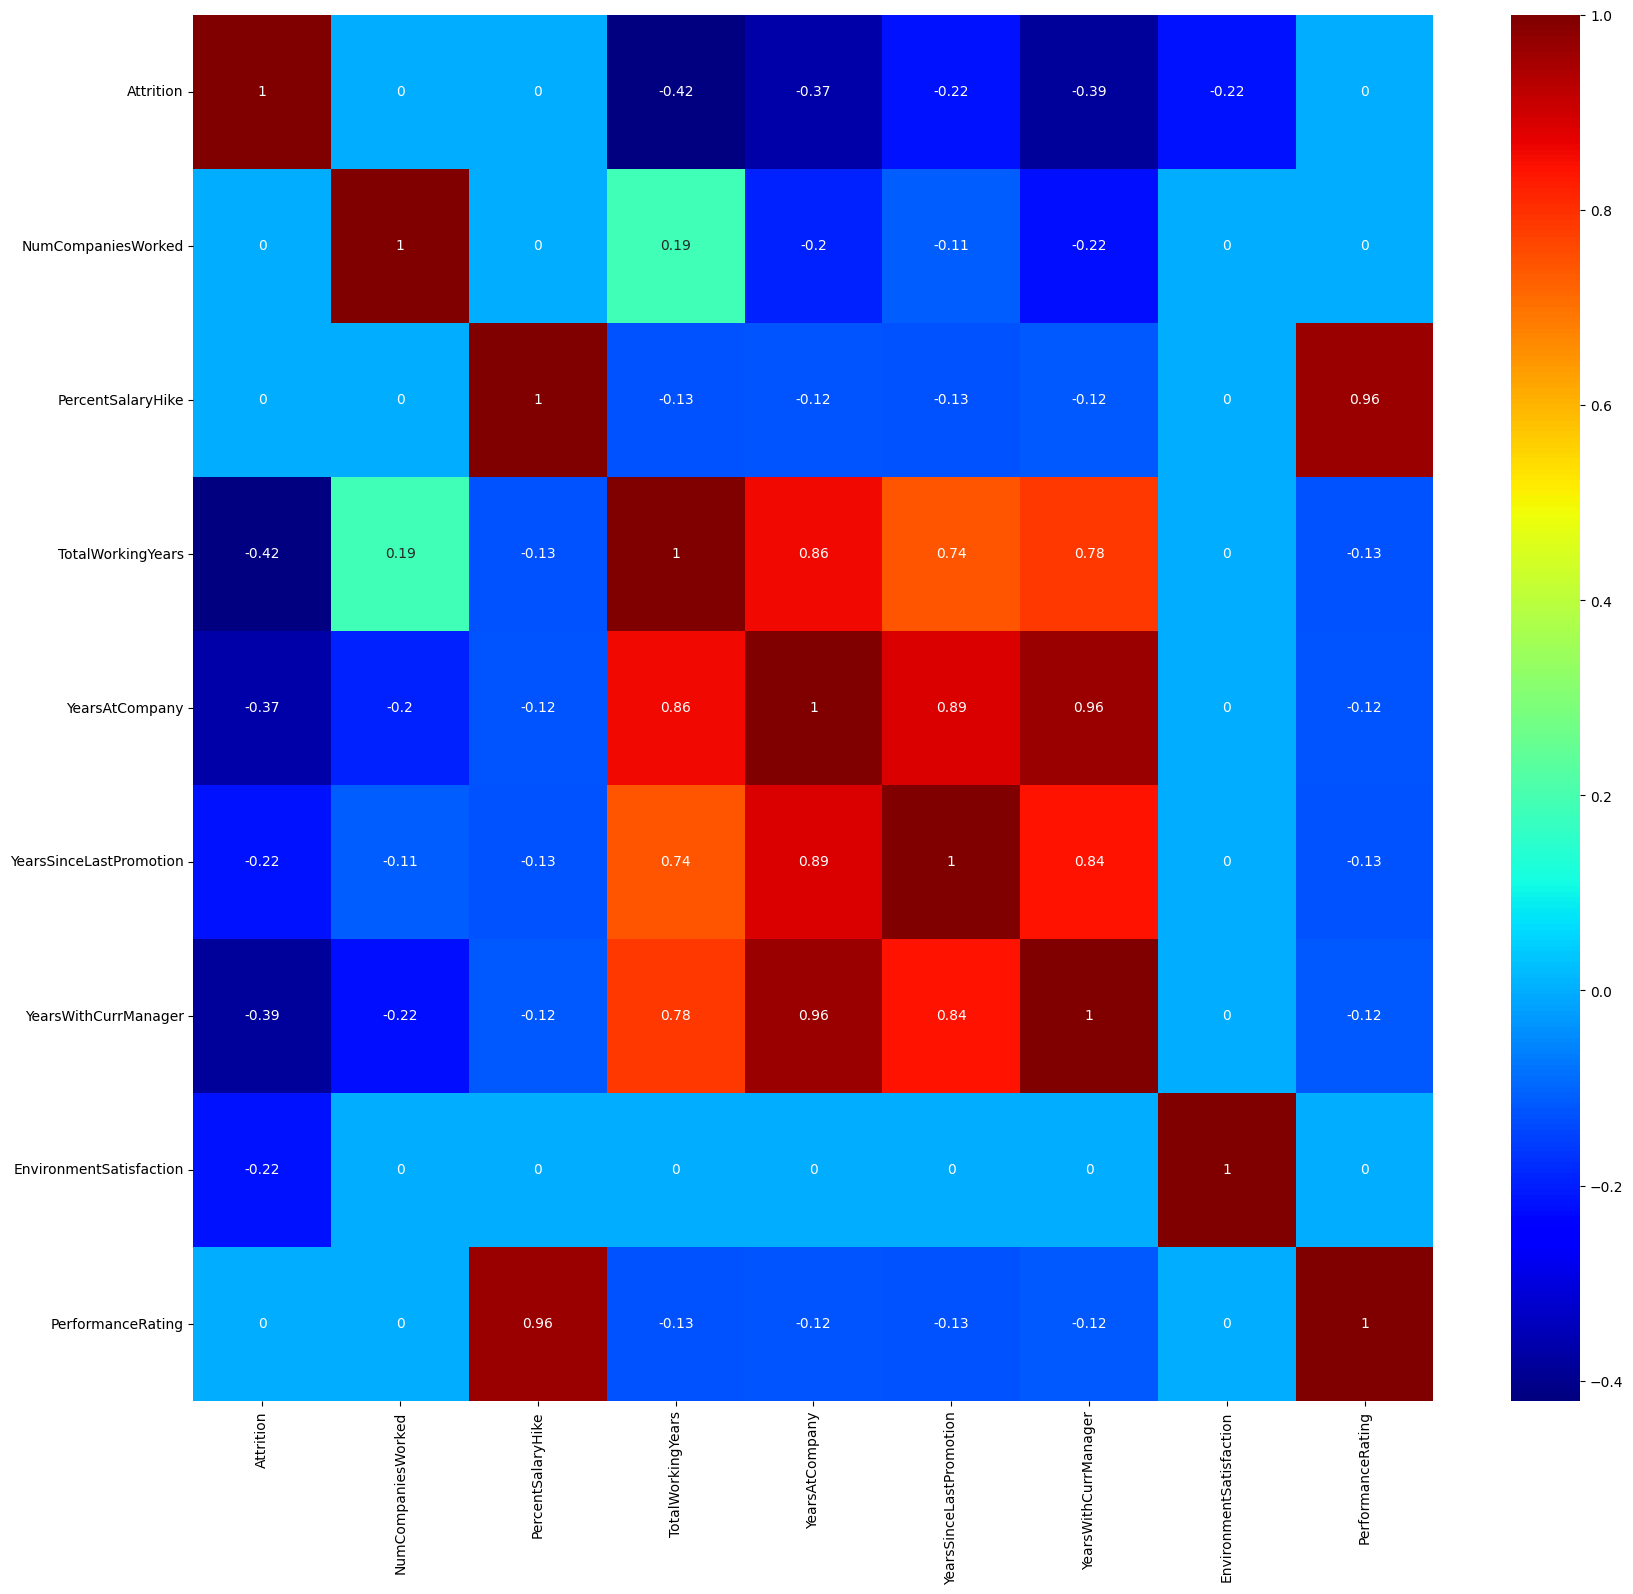

In [47]:
corr_tmp = corr_data[significant_parameter].corr()
corr_tmp = retain_terminal(corr_tmp)

plt.figure(figsize=(20,18))
sns.heatmap(corr_tmp, annot = True, cmap=plt.get_cmap("jet"))#, mask=np.triu(np.ones_like(corr_tmp, dtype=bool)))


In [72]:
general_data_copy = general_data_merged[corr_tmp.Attrition[corr_tmp.Attrition != 0].keys()]
general_data_copy

,Attrition,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction
0,-1,1.0,1,0,3.0
1,1,6.0,5,4,3.0
2,-1,5.0,5,3,2.0
3,-1,13.0,8,5,4.0
4,-1,9.0,6,4,4.0
...,...,...,...,...,...
4405,-1,10.0,3,2,4.0
4406,-1,10.0,3,2,4.0
4407,-1,5.0,4,2,1.0
4408,-1,10.0,9,8,4.0


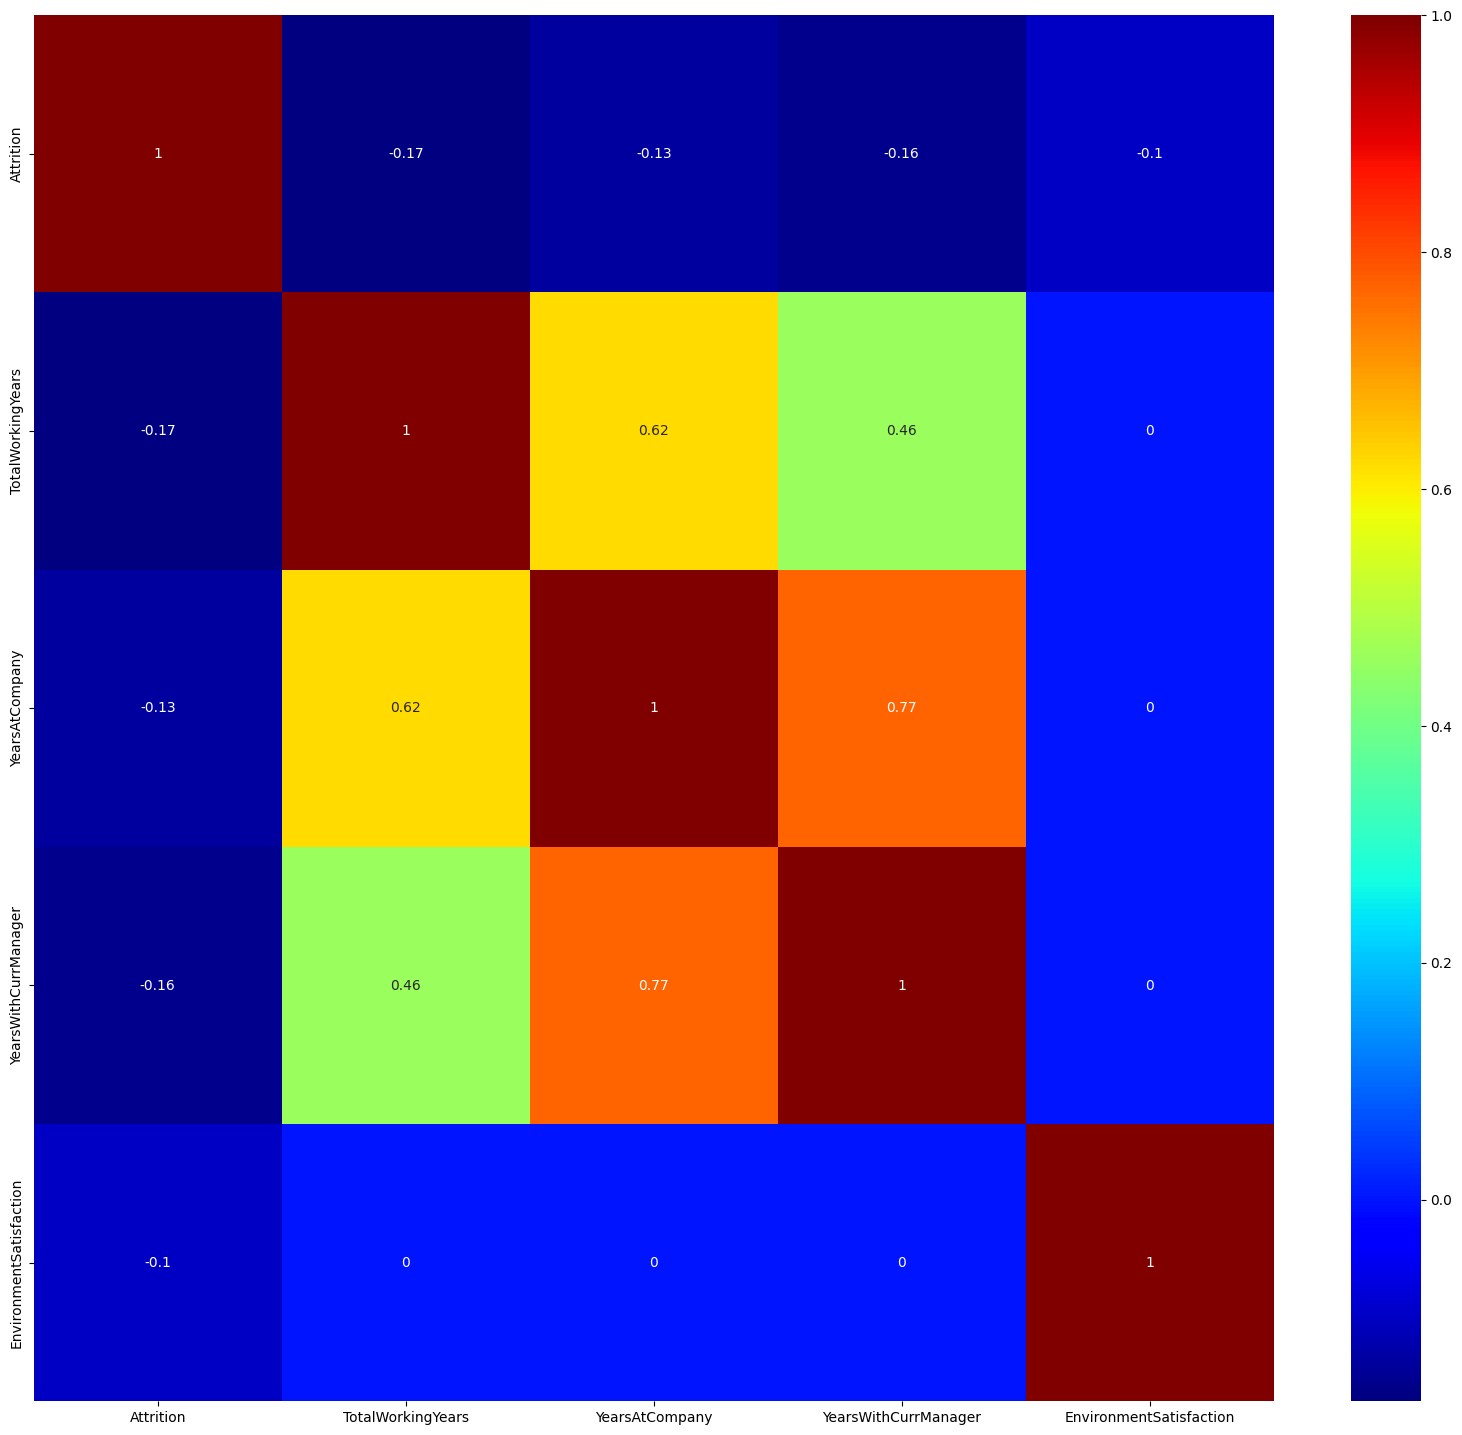

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fonction améliorée pour conserver uniquement les corrélations significatives
def retain_significant_correlations(df, threshold=0.1):
    return df.where(df.abs() > threshold, 0)

# Fonction améliorée pour séparer les paramètres significatifs et non significatifs
def separate_significant_parameters(df):
    significant_parameters = df.columns[df.any()].tolist()
    insignificant_parameters = df.columns[~df.any()].tolist()
    return significant_parameters, insignificant_parameters

# Calcul des corrélations et application du filtre
corr_data = general_data_copy.corr()
corr_data_filtered = retain_significant_correlations(corr_data)

# Séparation des paramètres significatifs et non significatifs
significant_parameters, insignificant_parameters = separate_significant_parameters(corr_data_filtered)

# Visualisation des corrélations significatives
plt.figure(figsize=(20,18))
sns.heatmap(corr_data_filtered, annot=True, cmap="jet")


# Mise à jour du jeu de données avec uniquement les paramètres significatifs
general_data_copy = general_data_copy[significant_parameters]

Couleur et corrélation : La barre de couleur sur le côté droit (également appelée barre de légende) montre que des valeurs de corrélation allant de -1 à 1. Des valeurs proches de 1 (teintes rouges) indiquent une corrélation positive forte, des valeurs proches de -1 (teintes bleues) indiquent une corrélation négative forte, et des valeurs autour de 0 (teintes vertes à jaunes) suggèrent peu ou pas de corrélation linéaire.

Variables sur les axes : Les variables sont affichées sur les axes X et Y. Chaque case dans la HeatMap représente le coefficient de corrélation entre les variables correspondantes sur l'axe X et Y.

Corrélation positive : Il semble y avoir une corrélation positive forte (jaune à rouge) entre certaines variables, comme 'TotalWorkingYears' et 'YearsAtCompany', 'YearsAtCompany' et 'YearsWithCurrManager', et 'TotalWorkingYears' et 'YearsWithCurrManager'. Ceci est logique car l'on peut s'attendre à ce que plus une personne travaille longtemps, plus elle reste dans la même entreprise ou avec le même manager.

Corrélation négative : Il n'y a pas de corrélation négative forte (bleu foncé) visible dans la HeatMap.

Pas de corrélation / corrélation faible : Beaucoup de paires de variables montrent des couleurs bleues claires ou vertes, indiquant une faible corrélation linéaire ou pas de corrélation significative.

Diagonale : La diagonale de la HeatMap affiche toujours une corrélation parfaite (1) car elle représente la corrélation de chaque variable avec elle-même.

Zéros dans la HeatMap : Il y a des cases avec une valeur de '0', ce qui indique que la corrélation entre ces variables spécifiques a été définie à 0, probablement à la suite du filtrage pour ne conserver que les corrélations significatives (comme décrit dans le code précédent).

En résumé, cette HeatMap vous permet d'identifier les relations entre différentes mesures du temps passé dans une entreprise, qui semblent être les variables les plus corrélées entre elles. Cela pourrait suggérer que la durée de service est un facteur influençant d'autres aspects de l'expérience des employés. Les '0' indiquent que certaines corrélations ont été jugées non significatives et ont été filtrées. Il est important de noter que la corrélation ne signifie pas causalité; d'autres analyses seraient nécessaires pour déterminer les relations de cause à effet.

# pipeline

Accuracy: 0.84


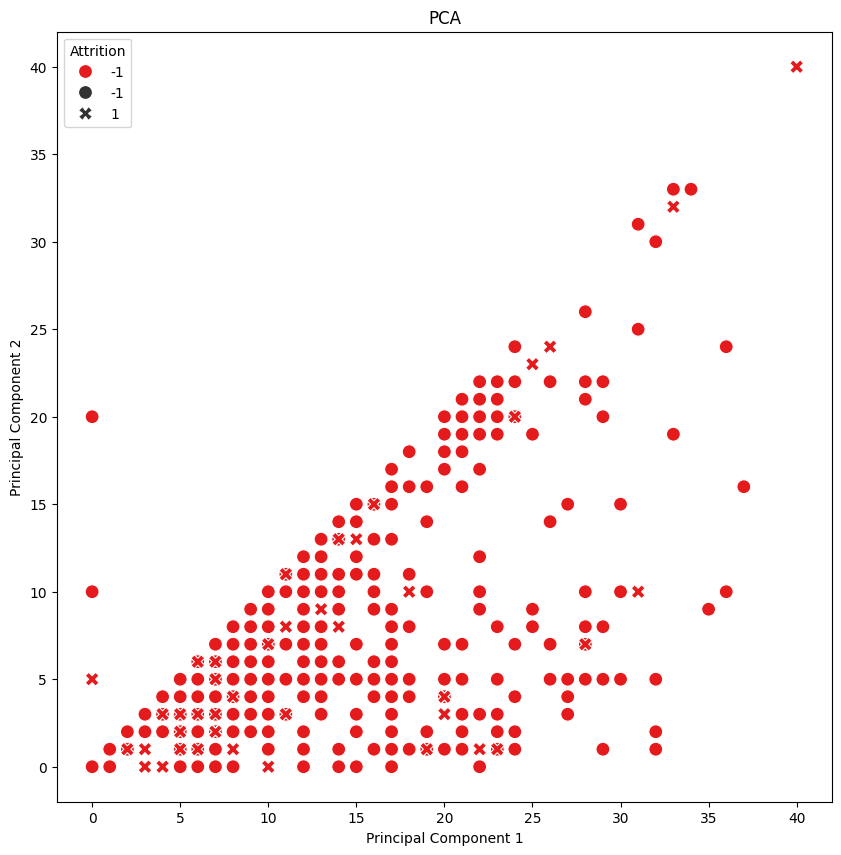

In [73]:
# pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Séparation des données en variables explicatives et variable cible
X = general_data_copy.drop('Attrition', axis=1)
y = general_data_copy['Attrition']

# Séparation des données en jeu d'entraînement et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', LogisticRegression())
])

# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = pipeline.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualisation des prédictions
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, style=y_test, s=100, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()



Le graphe que vous avez partagé semble être le résultat d'une Analyse en Composantes Principales (PCA) avec une superposition de points représentant deux classes d'attrition : -1 pour non et 1 pour oui, si nous interprétons les légendes littéralement. L'analyse PCA est souvent utilisée pour réduire la dimensionnalité des données tout en préservant autant de variabilité que possible.

Voici quelques points d'analyse pour le graphe :

Distribution des données : Les points sont répartis principalement le long du Principal Component 1 (PC1), ce qui suggère que PC1 capture une grande partie de la variance des données. Le Principal Component 2 (PC2) apporte également une certaine quantité d'informations, comme le montre la distribution des points le long de cet axe.

Séparation des classes : La séparation entre les classes -1 et 1 n'est pas très distincte, indiquant que les deux composantes principales ne parviennent pas à séparer complètement les données d'attrition en groupes clairement distincts.

Performance du modèle : Vous avez mentionné une précision (accuracy) de 0.84. Cela signifie que le modèle de classification qui utilise ces deux composantes principales peut correctement prédire l'attrition 84% du temps. C'est une performance assez bonne, surtout si l'on considère que l'ensemble de données peut être assez complexe et que la PCA est un outil de réduction de dimensionnalité plutôt qu'un classificateur.

Considérations supplémentaires : Bien que la précision soit un indicateur utile de la performance du modèle, elle ne donne pas toute l'image, surtout dans les cas où les classes sont déséquilibrées (c'est-à-dire que l'une des classes est beaucoup plus fréquente que l'autre). Il est donc important d'examiner également d'autres métriques telles que la précision, le rappel, le score F1, et la courbe ROC-AUC pour une évaluation complète.

Interprétation des composantes principales : Les axes de la PCA ne sont pas aussi interprétables que les variables originales, car chaque composant est une combinaison linéaire de toutes les variables. Une inspection plus détaillée des vecteurs propres pourrait donner des indications sur les variables les plus influentes pour chaque composant principal.

En conclusion, le PCA a réussi à projeter les données sur deux dimensions avec une séparation raisonnable entre les classes d'attrition, et le modèle a une bonne précision de classification. Pour améliorer la compréhension du modèle, il serait bénéfique de consulter la matrice de confusion, les scores de classification par classe et d'examiner si d'autres méthodes ou un nombre différent de composants principaux pourraient fournir une meilleure séparation des classes.

In [74]:
#matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[737,   0],
       [145,   0]], dtype=int64)

True Negatives (TN): 737 représente le nombre d'observations négatives correctement classées par le modèle. Autrement dit, 737 fois, le modèle a prédit la classe -1 (non attrition) et c'était effectivement la classe réelle.

False Negatives (FN): 145 représente le nombre d'observations positives qui ont été incorrectement classées en tant que négatives par le modèle. Cela signifie que 145 fois, des employés ayant quitté l'entreprise (attrition) ont été prédits à tort comme étant des non-départ.

True Positives (TP): 0 indique que le modèle n'a correctement identifié aucun cas positif réel d'attrition.

False Positives (FP): 0 signifie que le modèle n'a pas fait d'erreurs en prédisant la classe positive là où c'était en fait une classe négative.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Supposons que X_train, X_test, y_train, y_test soient déjà définis

# Définition de la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],    # Nombre minimum d'échantillons requis à chaque feuille
    'bootstrap': [True, False]        # Méthode d'échantillonnage des ensembles de données
}

# Création du modèle de base à tuner
rf = RandomForestClassifier(random_state=42)

# Recherche en grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustement du modèle GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage de la meilleure combinaison d'hyperparamètres
print(f'Meilleurs hyperparamètres: {grid_search.best_params_}')

# Entraînement du modèle avec la meilleure combinaison d'hyperparamètres
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matrice de confusion:')
print(cm)




    



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs hyperparamètres: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.89
Matrice de confusion:
[[711  26]
 [ 70  75]]


Precision: 0.74
Recall: 0.52
F1-score: 0.61


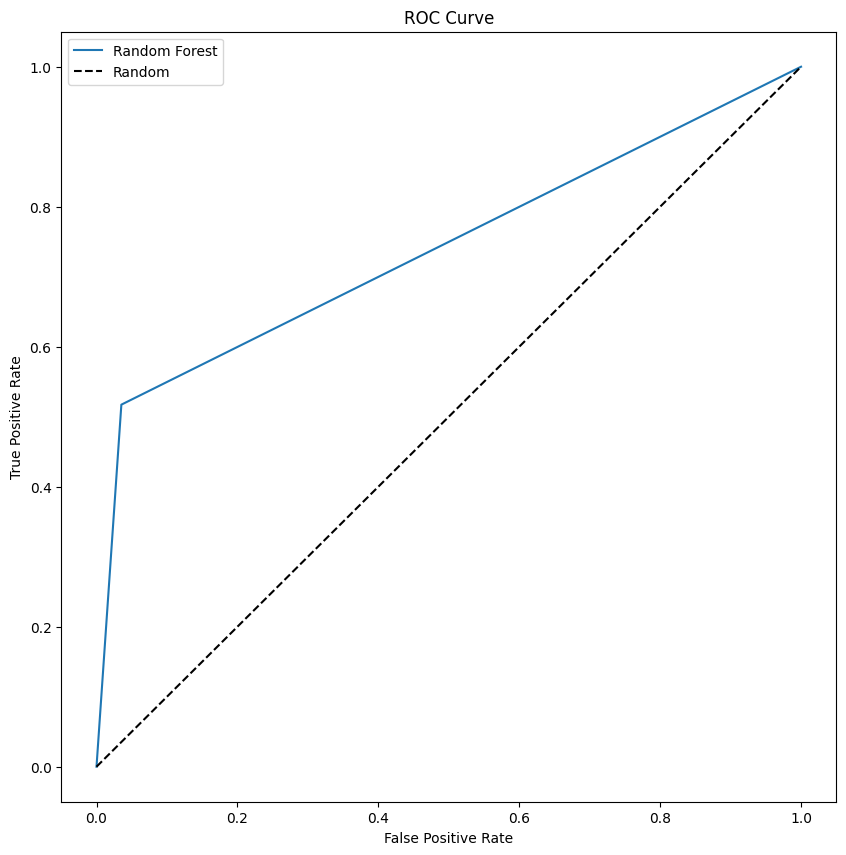

In [84]:
#precision du modèle 
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# rappel du modèle
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1-score du modèle
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Courbe ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
